<a href="https://colab.research.google.com/github/AlexAlexeyuk/Alexander.Alexeyuk/blob/master/20/02/2021_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
!pip install sdv

In [42]:
import matplotlib.pyplot as plt


In [43]:
df  = pd.read_csv('/content/Covid_Data_Proc_2.csv')

In [44]:
df.columns

Index(['Unnamed: 0', 'ID', 'Max_Procalcitonine', 'Max_Platlets',
       'Min_Platlets', 'Init_ESR', 'Max_ESR', 'Init_Fibrinogen',
       'Max_Fibrinogen', 'Initial_LDH', 'Max_LDH', 'Max_Leucocytes',
       'Min_Leucocytes', 'Hemoglobin', 'Max_Creatinine', 'Min_Cratinine',
       'Gender', 'initial_CRP', 'Max_CRP', 'Treatment', 'Diagnosis',
       'COVID-19', 'Pneumonia', 'Severity', 'IHD', 'COPD', 'Bronchial_asthma',
       'Obesity', 'Diabetes', 'RF', 'ALT', 'AST', 'duration', 'Age',
       'Max_Creatinine_mg_dl', 'GFR', 'L/Pl_Ratio'],
      dtype='object')

In [45]:
df = df.drop(['Unnamed: 0', 'ID','Hemoglobin',
              'Diagnosis', 'Treatment', 'Min_Cratinine', 
              'COVID-19', 'Pneumonia'], axis = 1)

In [46]:
df["RF"] = df["RF"].astype('category')

In [47]:
df['Gender'] = df['Gender'].map({'male':1, 'female': 0})

In [48]:
df = pd.get_dummies(df)

In [49]:
df.head()

,Max_Procalcitonine,Max_Platlets,Min_Platlets,Init_ESR,Max_ESR,Init_Fibrinogen,Max_Fibrinogen,Initial_LDH,Max_LDH,Max_Leucocytes,Min_Leucocytes,Max_Creatinine,Gender,initial_CRP,Max_CRP,Severity,IHD,COPD,Bronchial_asthma,Obesity,Diabetes,ALT,AST,duration,Age,Max_Creatinine_mg_dl,GFR,L/Pl_Ratio,RF_0.0,RF_1.0,RF_2.0,RF_3.0
0,0.10,269.0,194.0,28.0,41.0,3.90,6.93,923.0,923.0,10.02,7.39,107.0,0,68.90,68.9,1,0,0,0,0,0,381.4,61.6,27,82,0.946903,77.622865,3.809278,1,0,0,0
1,0.05,282.0,260.0,55.0,55.0,5.50,6.04,0.0,0.0,6.14,2.64,78.0,0,30.00,36.0,0,0,0,0,0,0,56.0,96.0,51,34,0.690265,123.837333,1.015385,1,0,0,0
2,0.20,440.0,149.0,26.0,51.0,0.00,0.00,0.0,0.0,7.59,5.80,656.0,0,5.74,61.5,0,0,0,0,0,0,17.0,25.0,17,66,5.805310,41.222179,3.892617,0,1,0,0
3,0.23,228.0,180.0,45.0,45.0,7.64,7.64,481.0,504.0,10.65,4.11,59.0,0,113.50,124.2,0,1,0,0,0,0,21.0,16.0,23,72,0.522124,106.353978,2.283333,1,0,0,0
4,0.07,236.0,113.0,26.0,35.0,1.20,5.98,533.0,533.0,13.88,4.94,107.0,1,36.10,171.6,1,1,0,0,0,0,0.0,0.0,30,68,0.946903,85.644640,4.371681,0,0,1,0


In [50]:
df[['RF_0.0',	'RF_1.0',	'RF_2.0',	'RF_3.0']]= df[['RF_0.0',	'RF_1.0',	'RF_2.0',	'RF_3.0']].astype('int')

In [52]:
from sdv.tabular import GaussianCopula
model = GaussianCopula()



NameError: ignored

In [ ]:
new_data_1 = model.sample(20000)
new_data_1.describe()

,Max_Platlets,Min_Platlets,Max_Leucocytes,Min_Leucocytes,Max_Creatinine,initial_CRP,Max_CRP,Severity,IHD,COPD,Bronchial_asthma,Obesity,Diabetes,ALT,AST,Max_Procalcitonine,duration,Age,Gender_female,Gender_male,RF_0.0,RF_1.0,RF_2.0,RF_3.0
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.0,20000.0,20000.0,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.0,20000.000000,20000.000000
mean,313.594033,313.593864,11.677963,11.678040,113.080722,6.745308e+01,9.058356e+01,0.516400,0.436000,0.0,0.0,0.0,0.0,60.083629,36.321910,0.148826,20.780400,60.171350,0.395600,0.600250,0.27805,0.0,0.393800,0.007900
std,115.303673,115.303187,16.690243,16.692846,2160.718754,7.267490e+01,8.485639e+01,0.585703,0.580621,0.0,0.0,0.0,0.0,214.596762,43.484781,0.122969,10.672922,13.472738,0.577856,0.585378,0.54328,0.0,0.574576,0.118905
min,-112.021284,-111.972022,-380.845212,-380.862482,-27589.727002,1.573626e-12,2.855681e-11,-1.000000,-2.000000,0.0,0.0,0.0,0.0,-13857.021814,-908.968149,0.050000,8.000000,4.000000,-2.000000,-1.000000,-2.00000,0.0,-1.000000,-1.000000
25%,234.883117,234.835704,8.399093,8.399645,83.279306,4.853736e+00,1.207962e+01,0.000000,0.000000,0.0,0.0,0.0,0.0,34.333933,21.204848,0.065960,13.000000,51.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000
50%,312.345754,312.358983,11.446191,11.447546,99.368198,3.681526e+01,6.473486e+01,1.000000,0.000000,0.0,0.0,0.0,0.0,59.194005,36.020653,0.105025,18.000000,60.000000,0.000000,1.000000,0.00000,0.0,0.000000,0.000000
75%,391.515637,391.531805,14.507901,14.507666,114.952917,1.175074e+02,1.599796e+02,1.000000,1.000000,0.0,0.0,0.0,0.0,83.969603,50.676130,0.186582,26.000000,69.000000,1.000000,1.000000,1.00000,0.0,1.000000,0.000000
max,792.689067,792.655241,1285.135439,1285.954635,302808.028896,2.376984e+02,2.646907e+02,3.000000,2.000000,0.0,0.0,0.0,0.0,13105.391393,1099.373938,1.908543,113.000000,109.000000,2.000000,3.000000,2.00000,0.0,2.000000,1.000000


In [ ]:
new_data_1['Obesity'].value_counts()

0    20000
Name: Obesity, dtype: int64

In [ ]:
new_data_1 = new_data_1[(new_data_1['Max_Platlets'] > 25 )
                        & (new_data_1['Min_Platlets'] > 25)
                        & (new_data_1['Min_Leucocytes']  >.9)
                        & (new_data_1['Min_Leucocytes']  <30)
                        & (new_data_1['Max_Leucocytes']  >.4)
                        & (new_data_1['Max_Leucocytes']  < 40)
                        & (new_data_1['Max_Creatinine']  > 60)
                        & (new_data_1['Max_Creatinine']  < 800)
                         & (new_data_1['initial_CRP']  > 6)
                         & (new_data_1['initial_CRP']  < 255)
                         & (new_data_1['Max_CRP']  > 30)
                         & (new_data_1['Max_CRP']  < 300)
                         & (new_data_1['Age']  > 20)
                         & (new_data_1['Age']  < 90)
                         & (new_data_1['IHD']  <=1)
                         & (new_data_1['IHD']  >= 0)
                         & (new_data_1['IHD']  <=1)
                         & (new_data_1['IHD']  >= 0)
                         & (new_data_1['COPD']  <=1)
                         & (new_data_1['COPD']  >= 0)
                         & (new_data_1['Diabetes']  <=1)
                         & (new_data_1['Diabetes']  >= 0)
                         & (new_data_1['Obesity']  < =1)
                         & (new_data_1['Obesity']  >= 0)
                         & (new_data_1['Bronchial_asthma']  <=1)
                         & (new_data_1['Bronchial_asthma']  >= 0)
                         & (new_data_1['Max_Procalcitonine']  > 0.07)
                         & (new_data_1['Max_Procalcitonine']  < 2.4)
                         & (new_data_1['duration']  > 4)
                         & (new_data_1['duration']  < 32)
                         & (new_data_1['RF_0.0']   >=0)
                          & (new_data_1['RF_1.0']   >=0)
                          & (new_data_1['RF_2.0']   >=0)
                          & (new_data_1['RF_3.0']   >=0)
                          & (new_data_1['RF_0.0']  <=1)
                          & (new_data_1['RF_1.0']   <=1)
                          & (new_data_1['RF_2.0']   <=1)
                          & (new_data_1['RF_3.0']   <=1)
                          & (new_data_1['Gender_female']   >=0)
                          & (new_data_1['Gender_male']   >=0)
                          & (new_data_1['Gender_female']  <=1)
                          & (new_data_1['Gender_male']   <=1)
                          & (new_data_1['Severity']   <=1)
                          & (new_data_1['Severity']   >=0)]

In [ ]:
new_data_1.describe()

,Max_Platlets,Min_Platlets,Max_Leucocytes,Min_Leucocytes,Max_Creatinine,initial_CRP,Max_CRP,Severity,IHD,COPD,Bronchial_asthma,Obesity,Diabetes,ALT,AST,Max_Procalcitonine,duration,Age,Gender_female,Gender_male,RF_0.0,RF_1.0,RF_2.0,RF_3.0
count,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5305.0,5305.0,5305.0,5305.0,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5305.0,5305.000000,5305.000000
mean,316.574052,316.573854,12.499711,12.499639,112.984542,103.168441,141.980236,0.533082,0.504430,0.0,0.0,0.0,0.0,75.210300,39.288909,0.192879,18.298586,61.641093,0.386239,0.598492,0.272762,0.0,0.444863,0.009425
std,110.620972,110.620118,4.715052,4.714923,51.045973,69.194191,71.133216,0.498951,0.500028,0.0,0.0,0.0,0.0,155.390715,37.303488,0.129403,6.026354,12.219173,0.486932,0.490250,0.445421,0.0,0.496997,0.096633
min,25.662203,25.625902,0.908701,0.910123,60.047697,6.032687,30.062570,0.000000,0.000000,0.0,0.0,0.0,0.0,-1227.783012,-482.663540,0.070056,8.000000,22.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,239.421545,239.441325,9.593980,9.594234,91.470805,41.877360,77.225145,0.000000,0.000000,0.0,0.0,0.0,0.0,42.879534,24.255715,0.101836,13.000000,53.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,317.719883,317.754326,12.132450,12.132396,103.196728,91.997349,139.523830,1.000000,1.000000,0.0,0.0,0.0,0.0,65.025333,38.053117,0.149051,18.000000,62.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000
75%,391.734712,391.724697,14.956199,14.957015,118.483413,161.587510,204.119810,1.000000,1.000000,0.0,0.0,0.0,0.0,90.390940,51.799179,0.240931,23.000000,70.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.000000
max,776.511387,776.482965,29.943035,29.939566,779.414158,237.699511,264.692466,1.000000,1.000000,0.0,0.0,0.0,0.0,7846.944138,537.402240,1.282297,31.000000,89.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [53]:
from sdv.tabular import CTGAN

model2 = CTGAN()
model2.fit(df)

NameError: ignored

In [ ]:
new_data_2 = model2.sample(472)

In [ ]:
new_data_2.head()

,Max_Platlets,Min_Platlets,Max_Leucocytes,Min_Leucocytes,Max_Creatinine,Min_Cratinine,initial_CRP,Max_CRP,Birthday,Admission,Discharge,COVID-19,Pneumonia,Severity,IHD,COPD,Bronchial_asthma,Obesity,Diabetes,ALT,AST,Initial_Procalcitonine,Max_Procalcitonine,duration,Age,RF_0.0,RF_1.0,RF_2.0,RF_3.0
0,342.595633,235.622656,4.631415,1.436672,-30.239923,84.891247,23.559262,-55.707338,1951-05-20,2020-07-07,2021-04-05,0,1,0,0,0,0,0,0,208.250940,210.936595,0.466240,0.121370,17,45,0.791473,-0.157124,0.071858,0.021498
1,219.708161,207.556040,5.564088,12.171722,54.733168,114.334871,152.865790,81.888751,1934-03-08,2021-02-11,2020-10-10,0,0,0,0,0,0,0,0,0.228424,84.418034,0.084668,0.079555,11,23,0.780462,0.526681,0.000817,0.022923
2,105.676409,440.026058,192.642641,444.167154,-75.099963,69.431054,73.265072,226.997496,1955-03-01,2020-12-08,2020-11-07,0,0,0,0,0,0,0,0,-25.720338,113.228222,0.924441,0.029103,37,66,0.692065,0.095608,-0.258583,-0.154318
3,346.301467,100.129660,-3.579793,12.811386,72.006573,68.863346,64.939046,277.523117,1930-09-10,2020-10-15,2020-10-31,1,1,0,1,0,0,0,1,-54.413976,85.730894,0.905867,0.705599,10,62,0.223343,-0.072843,-0.127227,0.022065
4,366.475928,105.838864,10.251465,11.230742,96.587466,59.804963,12.631061,66.839062,1973-06-07,2020-08-10,2019-10-25,0,1,0,0,0,0,0,0,146.438555,31.082479,0.020986,0.020099,63,42,0.615164,0.051813,-0.011834,0.068741


In [ ]:
model2_ = CTGAN()
model2_.fit(data)

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/s

In [ ]:
new_data_2_ = model2_.sample(400)

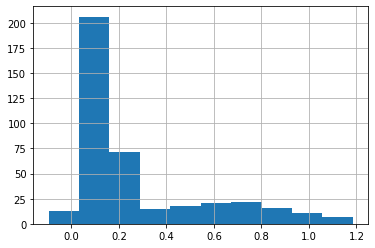

In [ ]:
new_data_2_['Max_Procalcitonine'].hist()

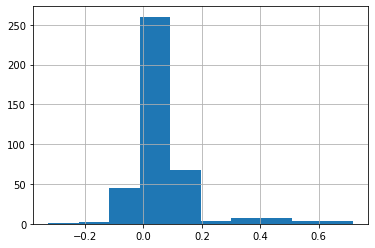

In [ ]:
new_data_2['Max_Procalcitonine'].hist()

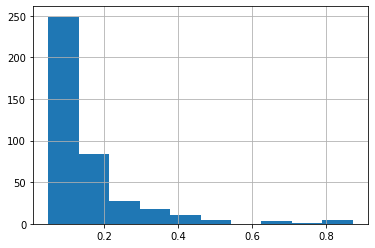

In [ ]:
new_data_1_['Max_Procalcitonine'].hist()

In [ ]:
from sdv.tabular import TVAE

model = TVAE()
model.fit(df)

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/s

In [ ]:
new_data_3 = model.sample(500)

In [ ]:
new_data_2 = model.sample(500)

In [ ]:
new_data_2.to_csv('gen_Data_16_02_2021.csv')

In [ ]:
new_data_2.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID', 'Max_Platlets', 'Min_Platlets',
       'Max_Leucocytes', 'Min_Leucocytes', 'Hemoglobin', 'Max_Creatinine',
       'Min_Cratinine', 'Gender', 'initial_CRP', 'Max_CRP', 'Treatment',
       'Birthday', 'Admission', 'Discharge', 'Diagnosis', 'COVID-19',
       'Pneumonia', 'Severity', 'IHD', 'COPD', 'Bronchial_asthma', 'Obesity',
       'Diabetes', 'RF', 'ALT', 'AST', 'Initial_Procalcitonine',
       'Max_Procalcitonine', 'duration', 'Age'],
      dtype='object')

In [ ]:

new_data_2['Age'] =  new_data_2['Age'].map(lambda x: x + 10 if x < 10 else x)

In [ ]:
new_data_2 = new_data_2.append(df)


In [ ]:
l = df[df['Max_Procalcitonine'] > .3]


In [ ]:
new_data_2 = new_data_2.append(l)

In [ ]:
new_data_2.to_csv('g_data_1.csv')

In [ ]:
new_data_2.shape

(537, 33)

In [ ]:
dataf = df.copy()

In [ ]:
dataf = dataf.drop(['Unnamed: 0', 'Unnamed: 0.1',
         'ID', 'Diagnosis', 
         'COVID-19', "Treatment", 'duration',
          'Birthday', 'Admission', 'Discharge', 'Diagnosis',
          'Pneumonia', 'Hemoglobin'], axis=1)

KeyError: ignored

In [ ]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
def ind_ab(x):
  if x > .4:
    return 1
  else:
    return 0

In [ ]:
dataf['Ab_ind'] = dataf['Max_Procalcitonine'].apply(ind_ab)

In [ ]:
dataf['Ab_ind'].value_counts()

0    1040
1     128
Name: Ab_ind, dtype: int64

In [ ]:
dataf = dataf.drop(['Max_Procalcitonine', 'Initial_Procalcitonine'], axis=1)

In [ ]:
neg, pos = np.bincount(dataf['Ab_ind'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 1168
    Positive: 128 (10.96% of total)



In [ ]:
dataf[['Max_Platlets', 'Min_Platlets', 'Max_Leucocytes', 'Min_Leucocytes',
        'Max_Creatinine', 'Min_Cratinine', 'Gender',
       'initial_CRP', 'Max_CRP',  'Severity', 'IHD', 'COPD',
       'Bronchial_asthma', 'Obesity', 'Diabetes', 'RF', 'ALT', 'AST', 'Age',
       'Ab_ind']].describe

KeyError: ignored

In [ ]:
cleaned_df = dataf.copy()


In [ ]:
cleaned_df['Gender'] = cleaned_df['Gender'].map({'male': 1, 'female': 0})

KeyError: ignored

In [ ]:
cleaned_df= cleaned_df.drop(['Birthday',
       'Admission', 'Discharge'], axis=1)

In [ ]:
# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Ab_ind'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Ab_ind'))
test_labels = np.array(test_df.pop('Ab_ind'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [ ]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (747,)
Validation labels shape: (187,)
Test labels shape: (234,)
Training features shape: (747, 24)
Validation features shape: (187, 24)
Test features shape: (234, 24)


In [ ]:
#cleaned_df = cleaned_df.drop(['Initial_Procalcitonine', 'Max_Procalcitonine'], axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


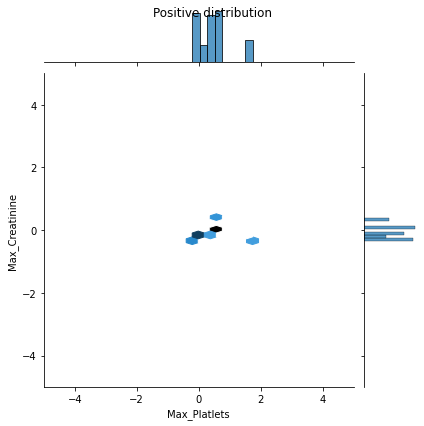

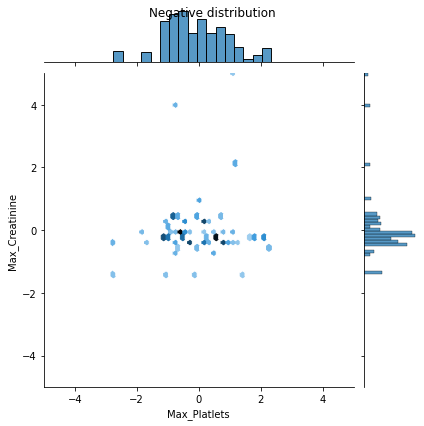

In [ ]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

sns.jointplot(pos_df['Max_Platlets'], pos_df['Max_Creatinine'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(neg_df['Max_Platlets'], neg_df['Max_Creatinine'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution")

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [ ]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [ ]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                400       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


In [ ]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 1.5259


In [ ]:
initial_bias = np.log([pos/neg])
initial_bias

array([-2.09494573])

In [ ]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.30420613],
       [0.06222624],
       [0.13896641],
       [0.07917133],
       [0.1169675 ],
       [0.0526343 ],
       [0.1283808 ],
       [0.17574927],
       [0.16101855],
       [0.12161478]], dtype=float32)

In [ ]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.3764


In [ ]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [ ]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

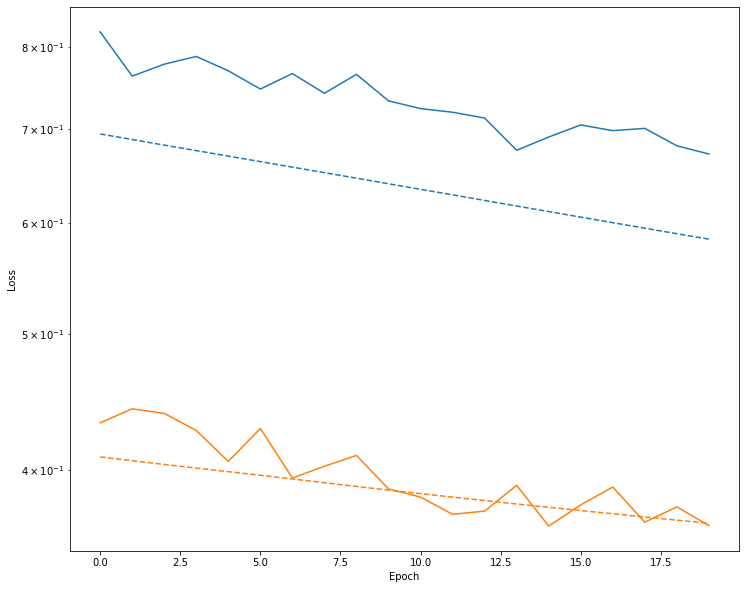

In [ ]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.4363 - tp: 0.0000e+00 - fp: 32.0000 - tn: 795.0000 - fn: 107.0000 - accuracy: 0.8512 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4788 - val_loss: 0.4087 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 164.0000 - val_fn: 23.0000 - val_accuracy: 0.8770 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4576
Epoch 2/100
1/1 [==============================] - 0s 58ms/step - loss: 0.4220 - tp: 0.0000e+00 - fp: 26.0000 - tn: 637.0000 - fn: 84.0000 - accuracy: 0.8527 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5161 - val_loss: 0.4060 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 164.0000 - val_fn: 23.0000 - val_accuracy: 0.8770 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4724
Epoch 3/100
1/1 [==============================] - 0s 49ms/step - loss: 0.4074 - tp: 0.0000e+00 - fp: 19.0000 - tn: 644.0000 - fn: 84.0000 - accuracy: 0.8621 - precision: 0.0000e+00 -

In [ ]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

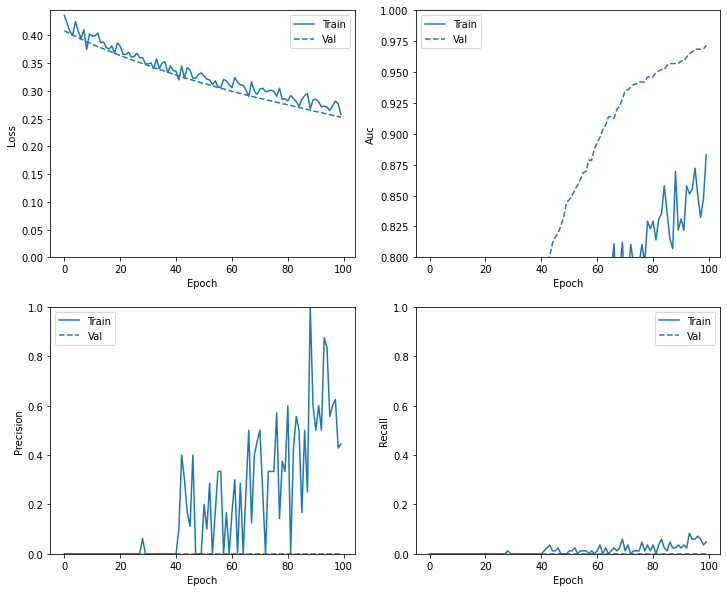

In [ ]:
plot_metrics(baseline_history)

In [ ]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [ ]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.2070566862821579
tp :  0.0
fp :  0.0
tn :  213.0
fn :  21.0
accuracy :  0.9102563858032227
precision :  0.0
recall :  0.0
auc :  0.9626649022102356

Legitimate Transactions Detected (True Negatives):  213
Legitimate Transactions Incorrectly Detected (False Positives):  0
Fraudulent Transactions Missed (False Negatives):  21
Fraudulent Transactions Detected (True Positives):  0
Total Fraudulent Transactions:  21


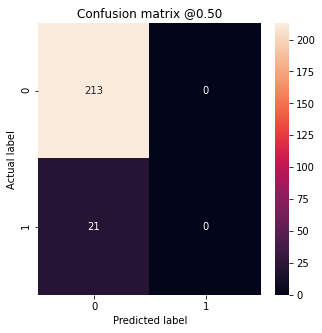

In [ ]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

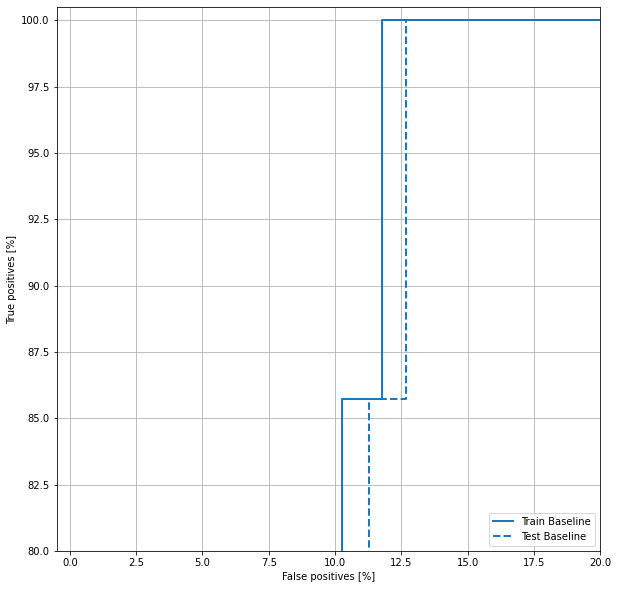

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [ ]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.56
Weight for class 1: 4.56


In [ ]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 1.2518 - tp: 0.0000e+00 - fp: 24.0000 - tn: 852.0000 - fn: 105.0000 - accuracy: 0.8685 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6275 - val_loss: 0.4082 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 164.0000 - val_fn: 23.0000 - val_accuracy: 0.8770 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4601
Epoch 2/100
1/1 [==============================] - 0s 57ms/step - loss: 1.2748 - tp: 0.0000e+00 - fp: 35.0000 - tn: 628.0000 - fn: 84.0000 - accuracy: 0.8407 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5074 - val_loss: 0.4051 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 164.0000 - val_fn: 23.0000 - val_accuracy: 0.8770 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4655
Epoch 3/100
1/1 [==============================] - 0s 48ms/step - loss: 1.3042 - tp: 0.0000e+00 - fp: 34.0000 - tn: 629.0000 - fn: 84.0000 - accuracy: 0.8420 - precision: 0.0000e+00 -

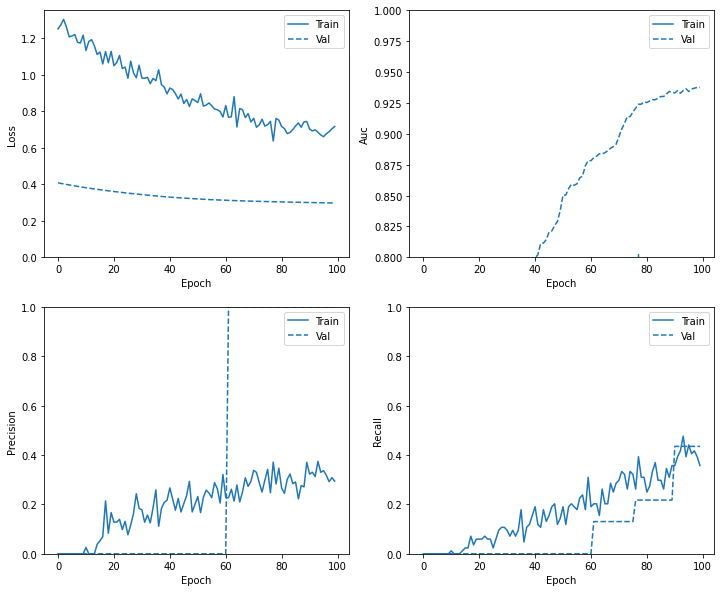

In [ ]:
plot_metrics(weighted_history)

In [ ]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.2897976338863373
tp :  9.0
fp :  0.0
tn :  213.0
fn :  12.0
accuracy :  0.9487179517745972
precision :  1.0
recall :  0.4285714328289032
auc :  0.897272527217865

Legitimate Transactions Detected (True Negatives):  213
Legitimate Transactions Incorrectly Detected (False Positives):  0
Fraudulent Transactions Missed (False Negatives):  12
Fraudulent Transactions Detected (True Positives):  9
Total Fraudulent Transactions:  21


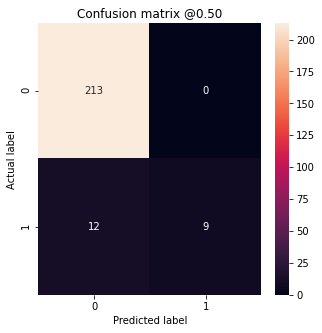

In [ ]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

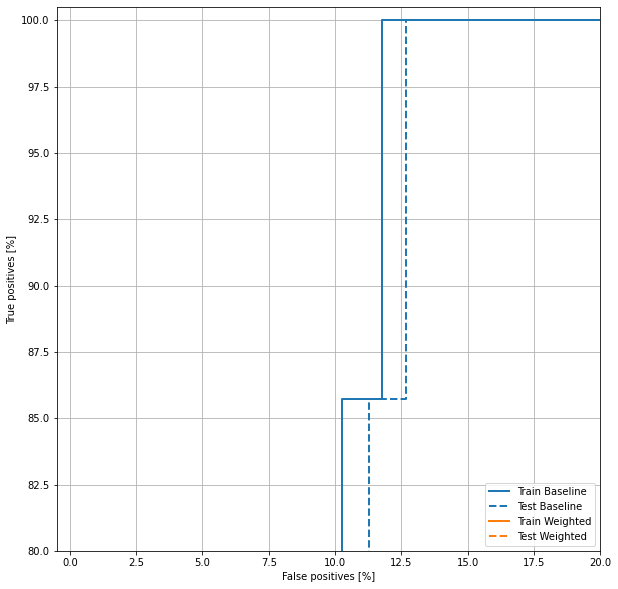

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [ ]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [ ]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(663, 24)

In [ ]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(1326, 24)

In [ ]:
BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [ ]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [ 1.7379294   1.7379294  -0.05274029 -0.05274029 -0.33853551 -0.41905154
  1.99124542  1.74599041  0.58611021  0.27634919  0.93390602  1.12411581
 -0.23150943 -0.13308333 -0.30085038 -0.11648399 -0.50649333 -0.72216102
  1.71394662 -0.84856235 -0.6357164  -0.60467406  1.21726233 -0.20807712]

Label:  1


In [ ]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [ ]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.49755859375


In [ ]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

2.0

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.8498 - tp: 411.0000 - fp: 434.0000 - tn: 693.0000 - fn: 618.0000 - accuracy: 0.5121 - precision: 0.4864 - recall: 0.3994 - auc: 0.5233 - val_loss: 0.6825 - val_tp: 3.0000 - val_fp: 27.0000 - val_tn: 52.0000 - val_fn: 4.0000 - val_accuracy: 0.6395 - val_precision: 0.1000 - val_recall: 0.4286 - val_auc: 0.4295
Epoch 2/100
1/1 [==============================] - 0s 58ms/step - loss: 0.8650 - tp: 403.0000 - fp: 458.0000 - tn: 580.0000 - fn: 607.0000 - accuracy: 0.4800 - precision: 0.4681 - recall: 0.3990 - auc: 0.4709 - val_loss: 0.6823 - val_tp: 3.0000 - val_fp: 27.0000 - val_tn: 52.0000 - val_fn: 4.0000 - val_accuracy: 0.6395 - val_precision: 0.1000 - val_recall: 0.4286 - val_auc: 0.4349
Epoch 3/100
1/1 [==============================] - 0s 55ms/step - loss: 0.8620 - tp: 430.0000 - fp: 497.0000 - tn: 556.0000 - fn: 565.0000 - accuracy: 0.4814 - precision: 0.4639 - recall: 0.4322 - auc: 0.4772 - val_loss: 0.6818 - val_

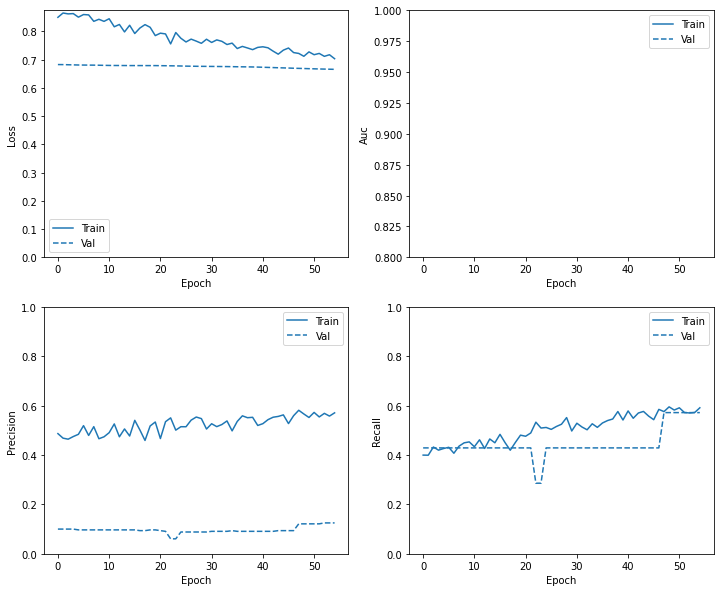

In [ ]:
plot_metrics(resampled_history)

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/1000
20/20 [==============================] - 3s 60ms/step - loss: 0.8524 - tp: 4875.5238 - fp: 5112.7143 - tn: 6191.0476 - fn: 6337.1905 - accuracy: 0.4892 - precision: 0.4859 - recall: 0.4291 - auc: 0.4813 - val_loss: 0.6811 - val_tp: 3.0000 - val_fp: 29.0000 - val_tn: 50.0000 - val_fn: 4.0000 - val_accuracy: 0.6163 - val_precision: 0.0938 - val_recall: 0.4286 - val_auc: 0.4611
Epoch 2/1000
20/20 [==============================] - 0s 19ms/step - loss: 0.7783 - tp: 5728.5714 - fp: 5178.5238 - tn: 6014.8571 - fn: 5508.5238 - accuracy: 0.5205 - precision: 0.5225 - recall: 0.5029 - auc: 0.5276 - val_loss: 0.6747 - val_tp: 3.0000 - val_fp: 31.0000 - val_tn: 48.0000 - val_fn: 4.0000 - val_accuracy: 0.5930 - val_precision: 0.0882 - val_recall: 0.4286 - val_auc: 0.4964
Epoch 3/1000
20/20 [==============================] - 0s 22ms/step - loss: 0.7284 - tp: 6294.4286 - fp: 5192.8571 - tn: 6133.3333 - fn: 4809.8571 - accuracy: 0.5512 - precision: 0.5435 - recall: 0.5622 - auc: 0.5738 - 

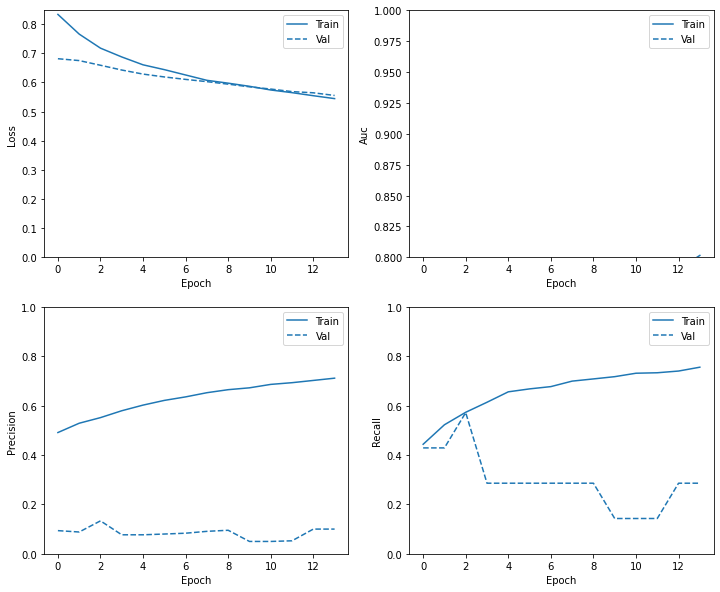

In [ ]:
plot_metrics(resampled_history)

In [ ]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.6625978946685791
tp :  5.0
fp :  42.0
tn :  60.0
fn :  1.0
accuracy :  0.6018518805503845
precision :  0.10638298094272614
recall :  0.8333333134651184
auc :  0.7663398385047913

Legitimate Transactions Detected (True Negatives):  60
Legitimate Transactions Incorrectly Detected (False Positives):  42
Fraudulent Transactions Missed (False Negatives):  1
Fraudulent Transactions Detected (True Positives):  5
Total Fraudulent Transactions:  6


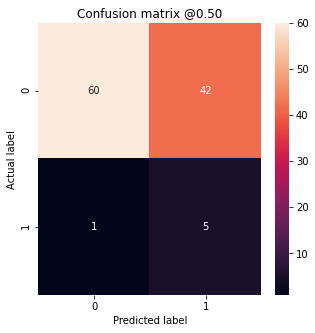

In [ ]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

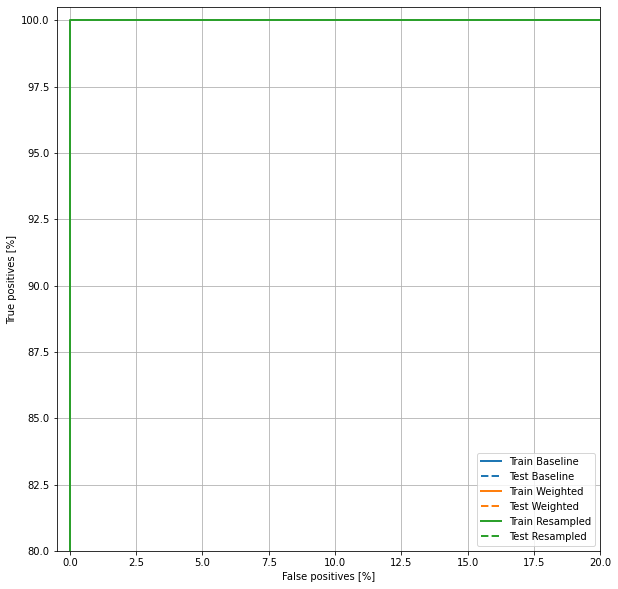

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')